In [11]:
%matplotlib inline
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, viewer
from scipy import ndimage
import glob
from collections import OrderedDict, Counter
import xmltodict
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from PIL import Image
from basic_image_eda import BasicImageEDA


def edge_detection(image):
    '''
    arg: image
    return: a dictionary of results
    '''
    im_gray = rgb2gray(image)

    #sobel filter for horizontal edge detection
    sobel_h = np.array([[1, 2, 1],
                       [0, 0, 0],
                       [-1, -2, -1]])

    #sobel filter for vertical edge detection
    sobel_v = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])

    # apply filters to the images
    h_edge = ndimage.convolve(im_gray, sobel_h, mode='reflect')
    v_edge= ndimage.convolve(im_gray, sobel_v, mode='reflect')

    imgs = OrderedDict()

    imgs['original'] = image
    imgs['gray scale'] = im_gray
    imgs['horizontal'] = h_edge
    imgs['vertical'] = v_edge
    
    return imgs

def plot_images(imgs):
    '''
    args: dictionary of images (result from  edge_detections())
    '''
    fig, axes = plt.subplots(2,2,figsize=(10,10))
    for im, ax in zip(imgs,axes.ravel()):
        ax.imshow(imgs[im],cmap='gray')
        ax.set_title(im)


In [2]:
# label of bojects
labels = ['7days',
          'coke',
          'evian',
          'maltesers',
          'redbull',
          'skittles',
          'snickers',
          'twix']
count_items = Counter()
xmls = glob.glob('./dataXmlFinal/*')

# meta data for each object in images
data_dict = {
    'image_name':[],
    'label':[],
    'xmin':[],
    'xmax':[],
    'ymin':[],
    'ymax':[]
}
for i, file in enumerate(xmls):
    _, file_name = os.path.split(file)
    file_name = file_name[:-4]
    data = xmltodict.parse(open(file,'r').read())
    if 'object' in data['annotation']:
        if isinstance(data['annotation']['object'],list):
            for item in data['annotation']['object']:
                count_items[item['name']] += 1
                data_dict['image_name'].append(file_name)
                data_dict['label'].append(item['name'])
                data_dict['xmin'].append(item['bndbox']['xmin'])
                data_dict['xmax'].append(item['bndbox']['xmax'])
                data_dict['ymin'].append(item['bndbox']['ymin'])
                data_dict['ymax'].append(item['bndbox']['ymax'])
        else:
            item = data['annotation']['object']
            count_items[item['name']] += 1
            data_dict['image_name'].append(file_name)
            data_dict['label'].append(item['name'])
            data_dict['xmin'].append(item['bndbox']['xmin'])
            data_dict['xmax'].append(item['bndbox']['xmax'])
            data_dict['ymin'].append(item['bndbox']['ymin'])
            data_dict['ymax'].append(item['bndbox']['ymax'])

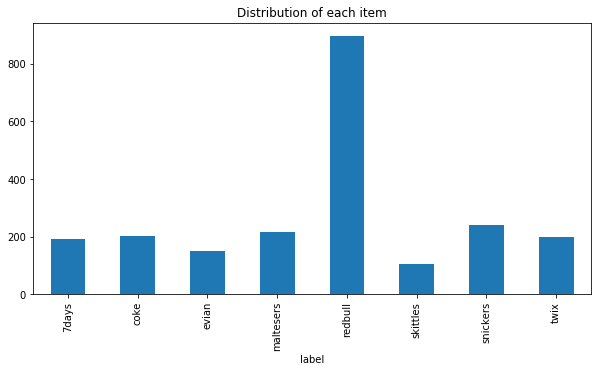

In [3]:
df = pd.DataFrame(data_dict)

df.groupby('label').image_name.count().plot(kind='bar',
                                            figsize=(10,5),
                                           title='Distribution of each item')

In [4]:
# change xmin,xmax,ymin,max it int
for col in df.columns[-4:]:
    df[col] = df[col].apply(int)

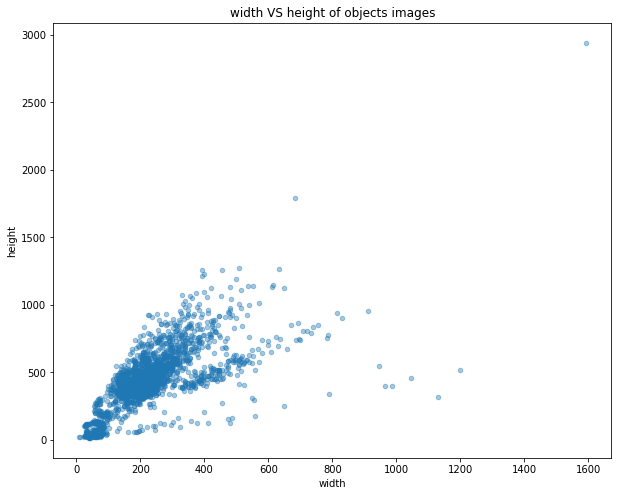

In [5]:


df['width'] = (df.xmax - df.xmin)
df['height'] = (df.ymax - df.ymin)
df['pic_size'] = df.width * df.height
df['scale_size'] = (df.pic_size - df.pic_size.mean())/df.pic_size.std(ddof=1)


df.plot(kind='scatter',
       x='width',
       y='height',
       figsize=(10,8),
       alpha=0.4,
       title='width VS height of objects images')


found 2203 images.


  0%|          | 11/2203 [00:00<00:23, 94.54it/s]

Using 12 threads. (max:12)



100%|██████████| 2203/2203 [00:11<00:00, 185.05it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  2203

dtype                                    |  uint8
channels                                 |  [3, 4]
extensions                               |  ['png']

min height                               |  14
max height                               |  2943
mean height                              |  453.09396277802995
median height                            |  435

min width                                |  8
max width                                |  1593
mean width                               |  235.17113027689516
median width                             |  215

mean height/width ratio                  |  1.9266563980219347
median height/width ratio                |  2.0232558139534884
recommended input size(by mean)          |  [456 232] (h x w, multiples of 8)
recommended input size(by mean)          |  [448 240] (h x w, multiples of 16)
recommen

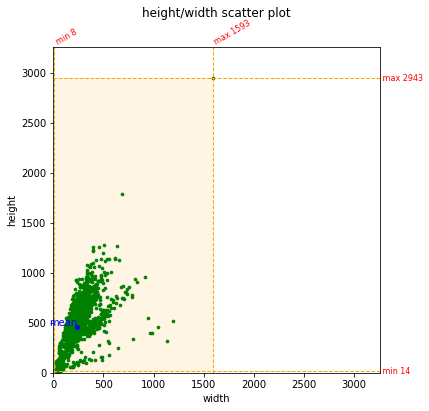

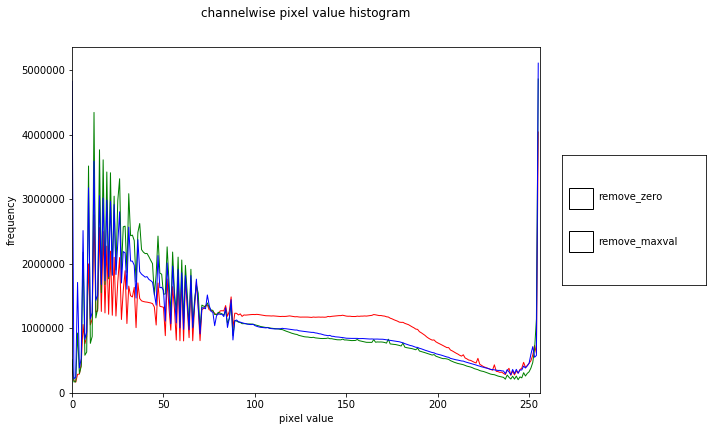

{'dtype': 'uint8',
 'channels': [3, 4],
 'extensions': ['png'],
 'min_h': 14,
 'max_h': 2943,
 'mean_h': 453.09396277802995,
 'median_h': 435,
 'min_w': 8,
 'max_w': 1593,
 'mean_w': 235.17113027689516,
 'median_w': 215,
 'mean_hw_ratio': 1.9266563980219347,
 'median_hw_ratio': 2.0232558139534884,
 'rec_hw_size_8': array([456, 232]),
 'rec_hw_size_16': array([448, 240]),
 'rec_hw_size_32': array([448, 224]),
 'mean': array([0.4330269 , 0.38910857, 0.40548715], dtype=float32),
 'std': array([0.26407543, 0.26573613, 0.27626598], dtype=float32)}

In [6]:

data_dir = "./cropPics"
# BasicImageEDA.explore(data_dir)

# # or

extensions = ['png', 'jpg', 'jpeg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0

BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

*-------------------------------------------------------------------------------*
./cropPicGroup/7days

found 193 images.


  0%|          | 0/193 [00:00<?, ?it/s]

Using 12 threads. (max:12)



100%|██████████| 193/193 [00:01<00:00, 188.55it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  193

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  14
max height                               |  1000
mean height                              |  321.3834196891192
median height                            |  385

min width                                |  32
max width                                |  540
mean width                               |  193.10362694300517
median width                             |  205

mean height/width ratio                  |  1.6643054549357377
median height/width ratio                |  1.8780487804878048
recommended input size(by mean)          |  [320 192] (h x w, multiples of 8)
recommended input size(by mean)          |  [320 192] (h x w, multiples of 16)
recommended i

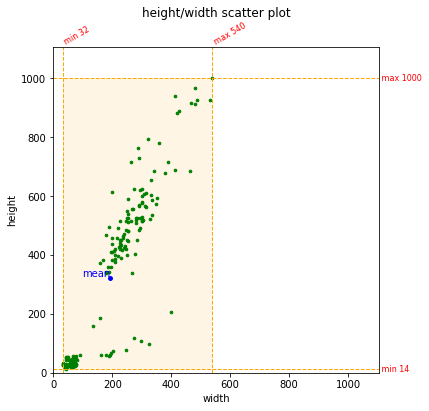

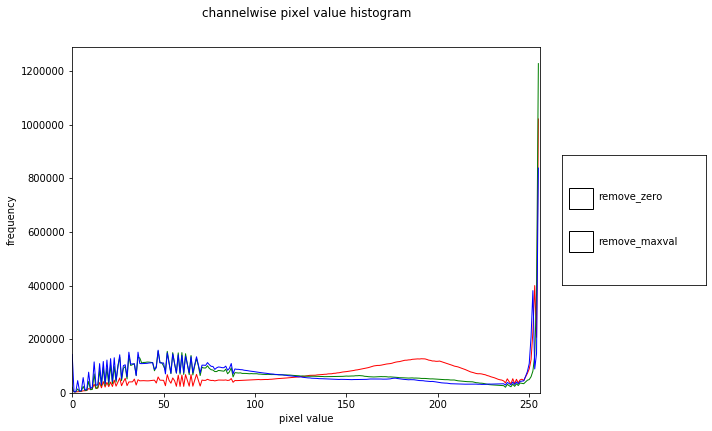

*-------------------------------------------------------------------------------*
./cropPicGroup/coke

found 201 images.


  6%|▋         | 13/201 [00:00<00:01, 119.06it/s]

Using 12 threads. (max:12)



100%|██████████| 201/201 [00:01<00:00, 129.17it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  201

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  125
max height                               |  2943
mean height                              |  497.6517412935323
median height                            |  435

min width                                |  63
max width                                |  1593
mean width                               |  248.7810945273632
median width                             |  225

mean height/width ratio                  |  2.0003599640035996
median height/width ratio                |  1.9333333333333333
recommended input size(by mean)          |  [496 248] (h x w, multiples of 8)
recommended input size(by mean)          |  [496 256] (h x w, multiples of 16)
recommended 

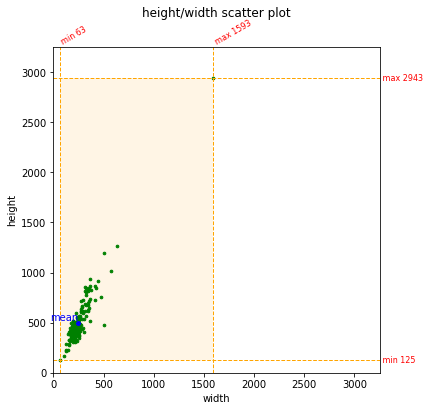

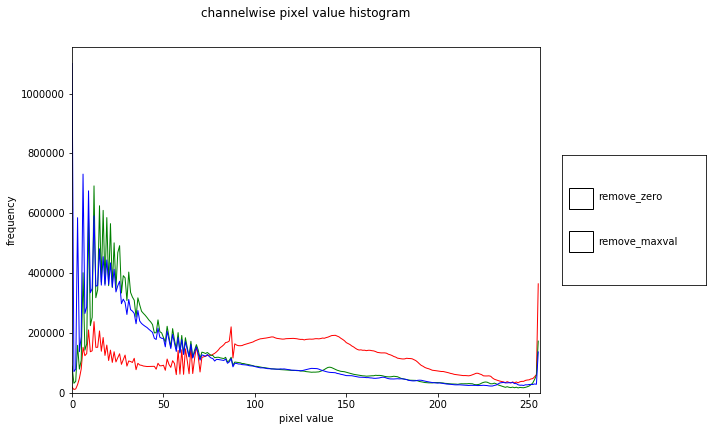

*-------------------------------------------------------------------------------*
./cropPicGroup/evian

found 150 images.


  7%|▋         | 11/150 [00:00<00:01, 108.44it/s]

Using 12 threads. (max:12)



100%|██████████| 150/150 [00:00<00:00, 155.51it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  150

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  68
max height                               |  1256
mean height                              |  448.42
median height                            |  390

min width                                |  24
max width                                |  553
mean width                               |  170.56666666666666
median width                             |  187

mean height/width ratio                  |  2.6290013679890563
median height/width ratio                |  2.085561497326203
recommended input size(by mean)          |  [448 168] (h x w, multiples of 8)
recommended input size(by mean)          |  [448 176] (h x w, multiples of 16)
recommended input size(by

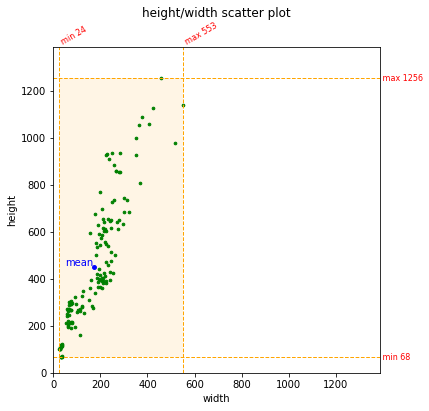

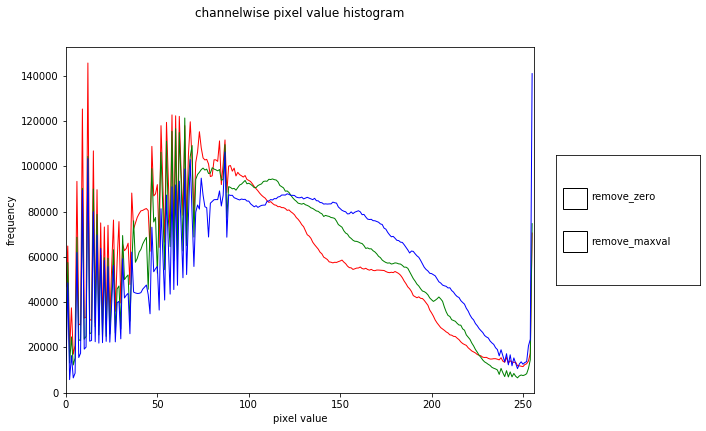

*-------------------------------------------------------------------------------*
./cropPicGroup/maltesers

found 216 images.


  0%|          | 0/216 [00:00<?, ?it/s]

Using 12 threads. (max:12)



100%|██████████| 216/216 [00:02<00:00, 92.80it/s] 



*--------------------------------------------------------------------------------------*
number of images                         |  216

dtype                                    |  uint8
channels                                 |  [3, 4]
extensions                               |  ['png']

min height                               |  18
max height                               |  955
mean height                              |  418.60185185185185
median height                            |  455

min width                                |  24
max width                                |  911
mean width                               |  370.6203703703704
median width                             |  395

mean height/width ratio                  |  1.129462612736403
median height/width ratio                |  1.1518987341772151
recommended input size(by mean)          |  [416 368] (h x w, multiples of 8)
recommended input size(by mean)          |  [416 368] (h x w, multiples of 16)
recommended 

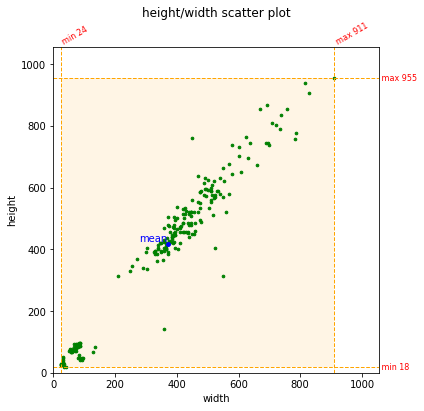

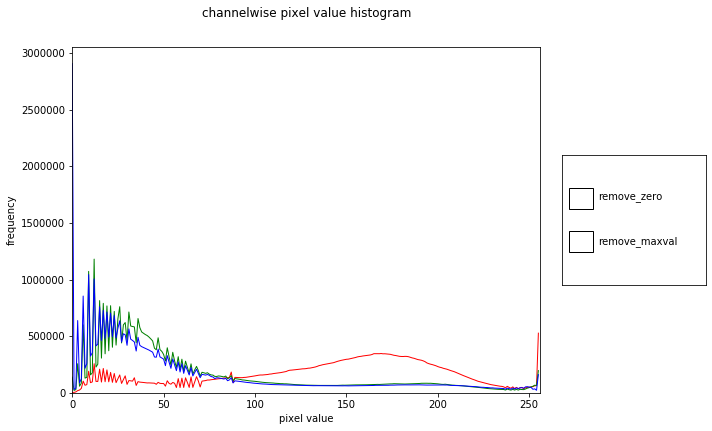

*-------------------------------------------------------------------------------*
./cropPicGroup/redbull

found 898 images.


  0%|          | 0/898 [00:00<?, ?it/s]

Using 12 threads. (max:12)



100%|██████████| 898/898 [00:05<00:00, 151.19it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  898

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  23
max height                               |  1790
mean height                              |  469.3619153674833
median height                            |  431

min width                                |  8
max width                                |  685
mean width                               |  231.33518930957683
median width                             |  220

mean height/width ratio                  |  2.0289257192919963
median height/width ratio                |  1.959090909090909
recommended input size(by mean)          |  [472 232] (h x w, multiples of 8)
recommended input size(by mean)          |  [464 224] (h x w, multiples of 16)
recommended inp

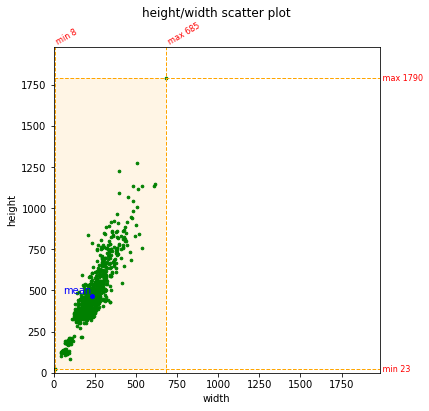

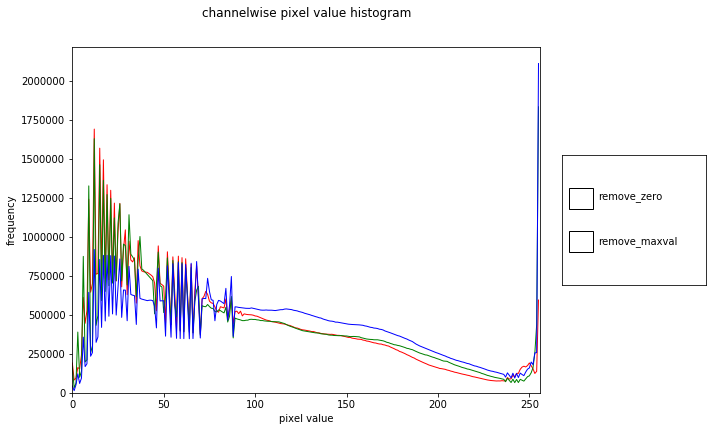

*-------------------------------------------------------------------------------*
./cropPicGroup/skittles

found 104 images.


 26%|██▌       | 27/104 [00:00<00:00, 259.78it/s]

Using 12 threads. (max:12)



100%|██████████| 104/104 [00:00<00:00, 286.03it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  104

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  26
max height                               |  590
mean height                              |  302.46153846153845
median height                            |  305

min width                                |  40
max width                                |  335
mean width                               |  201.52884615384616
median width                             |  200

mean height/width ratio                  |  1.500834963500167
median height/width ratio                |  1.525
recommended input size(by mean)          |  [304 200] (h x w, multiples of 8)
recommended input size(by mean)          |  [304 208] (h x w, multiples of 16)
recommended input size(by m

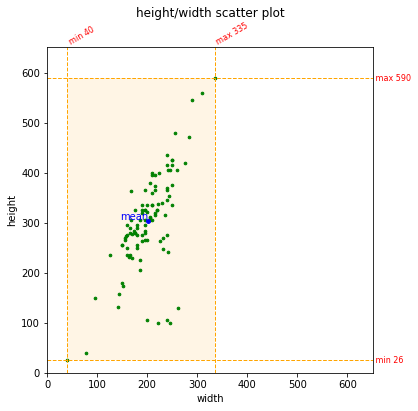

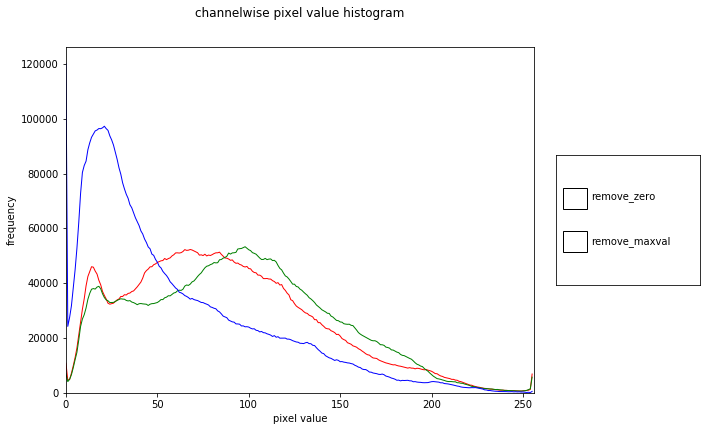

*-------------------------------------------------------------------------------*
./cropPicGroup/snickers

found 242 images.


  7%|▋         | 17/242 [00:00<00:01, 155.88it/s]

Using 12 threads. (max:12)



100%|██████████| 242/242 [00:01<00:00, 165.89it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  242

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  65
max height                               |  1215
mean height                              |  492.6528925619835
median height                            |  475

min width                                |  57
max width                                |  1131
mean width                               |  199.4504132231405
median width                             |  165

mean height/width ratio                  |  2.4700520024032984
median height/width ratio                |  2.878787878787879
recommended input size(by mean)          |  [496 200] (h x w, multiples of 8)
recommended input size(by mean)          |  [496 192] (h x w, multiples of 16)
recommended in

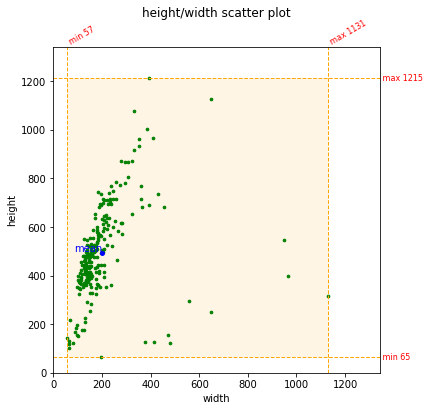

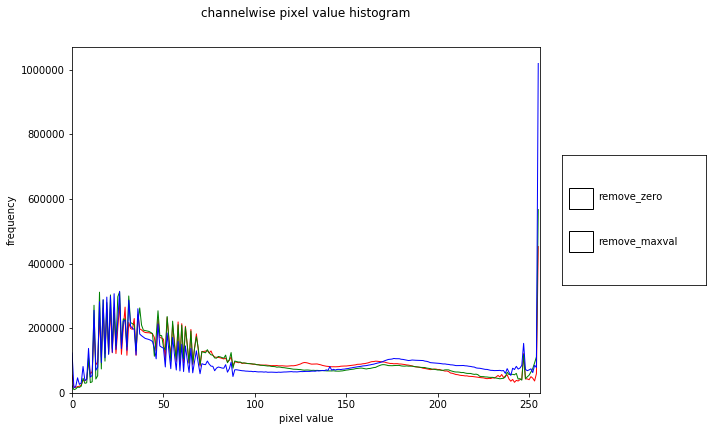

*-------------------------------------------------------------------------------*
./cropPicGroup/twix

found 199 images.


  4%|▍         | 8/199 [00:00<00:02, 79.56it/s]

Using 12 threads. (max:12)



100%|██████████| 199/199 [00:01<00:00, 138.62it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  199

dtype                                    |  uint8
channels                                 |  [3, 4]
extensions                               |  ['png']

min height                               |  132
max height                               |  1261
mean height                              |  533.9949748743719
median height                            |  490

min width                                |  120
max width                                |  1198
mean width                               |  242.23115577889448
median width                             |  210

mean height/width ratio                  |  2.204485104970542
median height/width ratio                |  2.3333333333333335
recommended input size(by mean)          |  [536 240] (h x w, multiples of 8)
recommended input size(by mean)          |  [528 240] (h x w, multiples of 16)
recommen

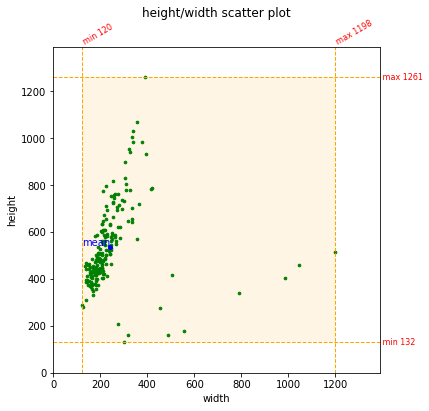

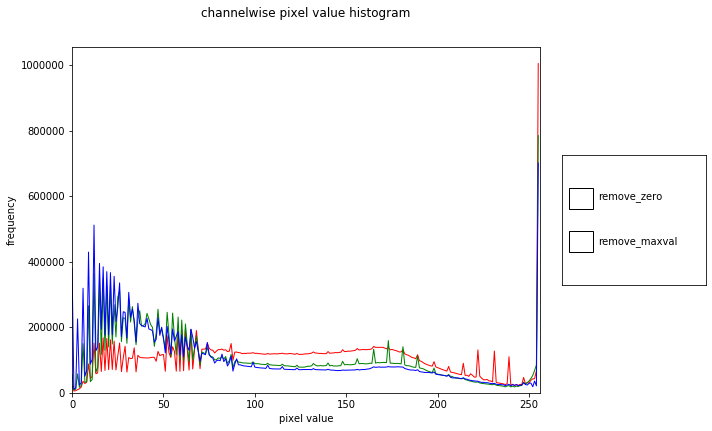

In [13]:
folders = glob.glob('./cropPicGroup/*')
for folder in folders:
    print('*-------------------------------------------------------------------------------*')
    print(folder)
    data_dir = folder

    extensions = ['png', 'jpg', 'jpeg']
    threads = 0
    dimension_plot = True
    channel_hist = True
    nonzero = False
    hw_division_factor = 1.0

    BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

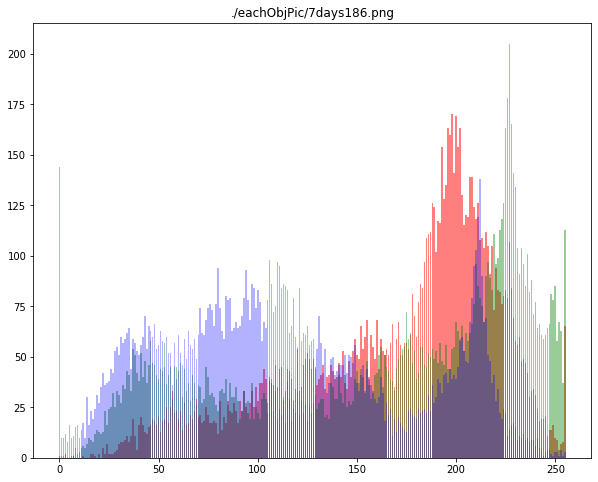

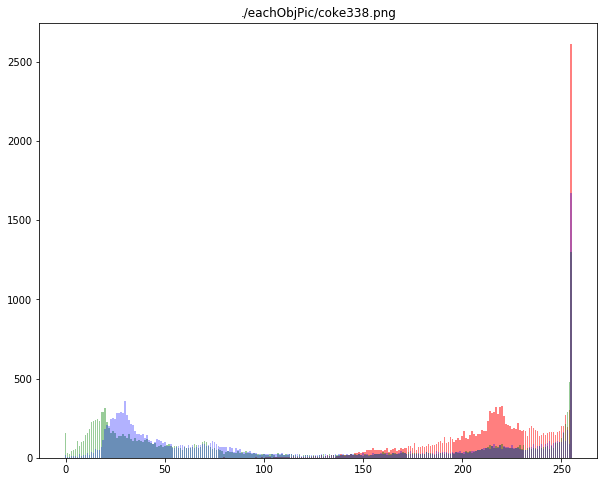

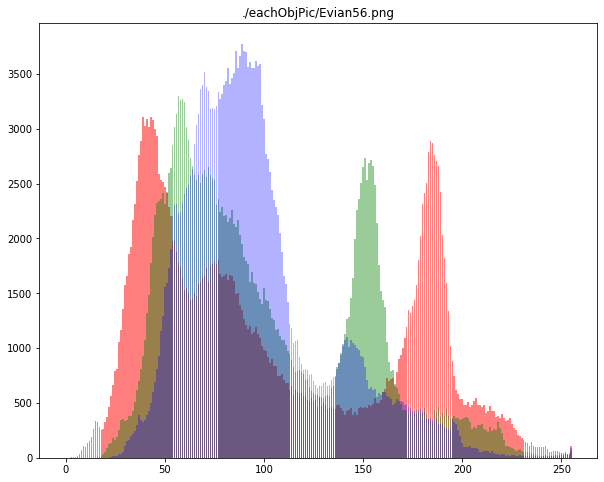

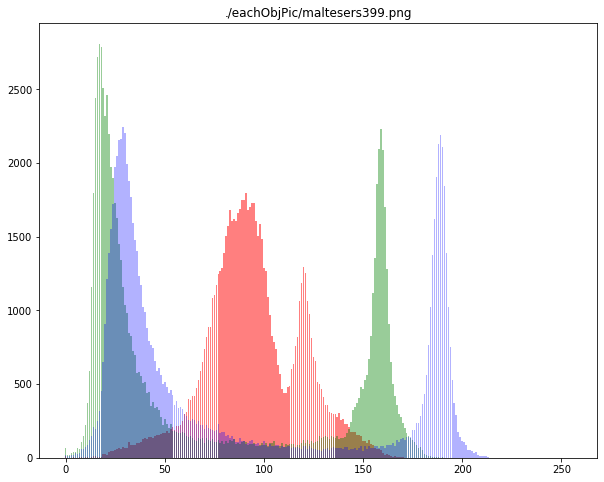

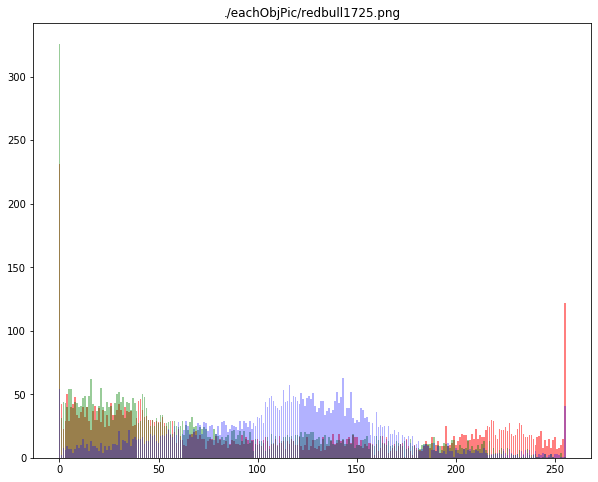

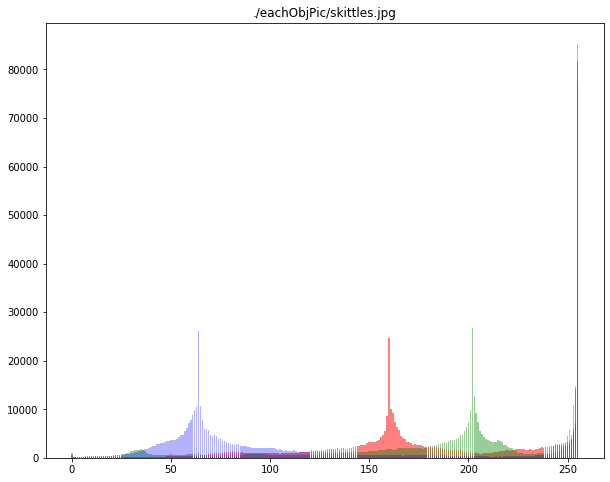

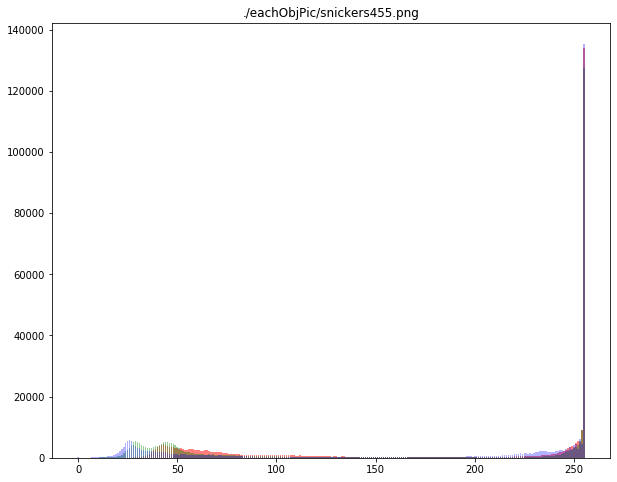

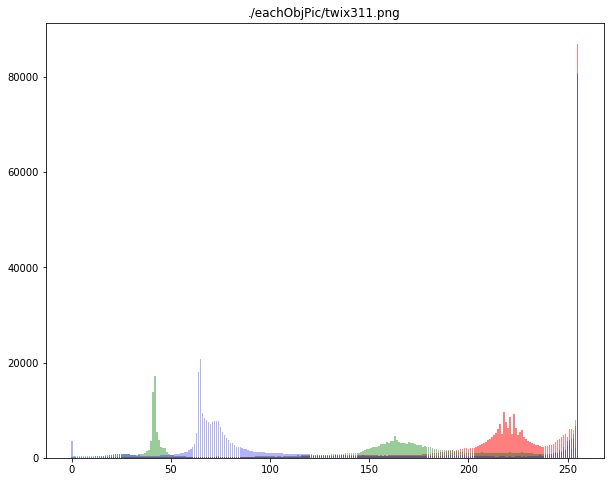

In [5]:
# RGB Histogram for each object (single image)
file_names = glob.glob('./eachObjPic/*')
for file in file_names:
    im = Image.open(file) 
    r, g, b = im.split()
    plt.figure(figsize=(10,8))
    plt.bar(range(256), r.histogram(), color='r', alpha=0.5)
    plt.bar(range(256), g.histogram(), color='g', alpha=0.4)
    plt.bar(range(256), b.histogram(), color='b', alpha=0.3)
    plt.title(file)
    plt.show()

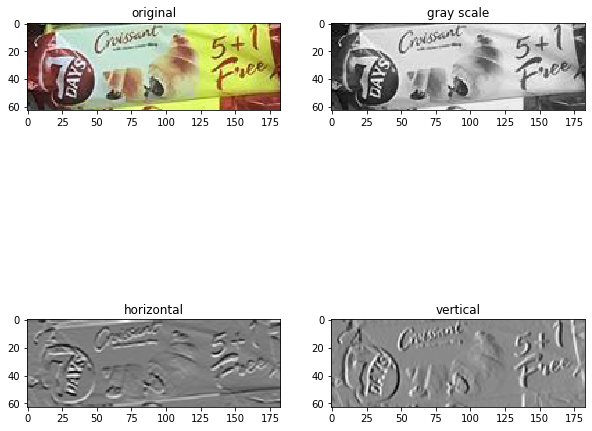

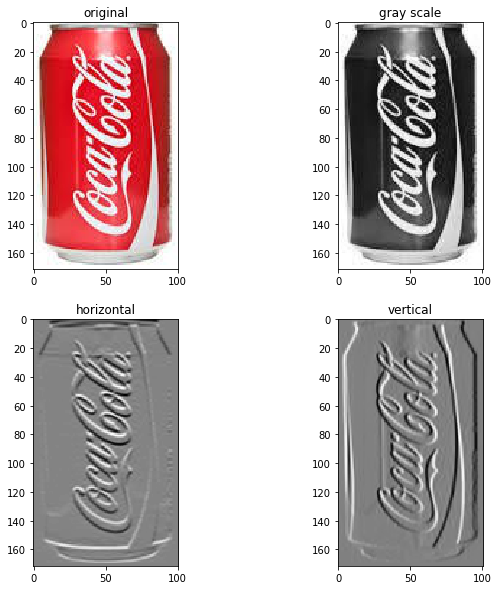

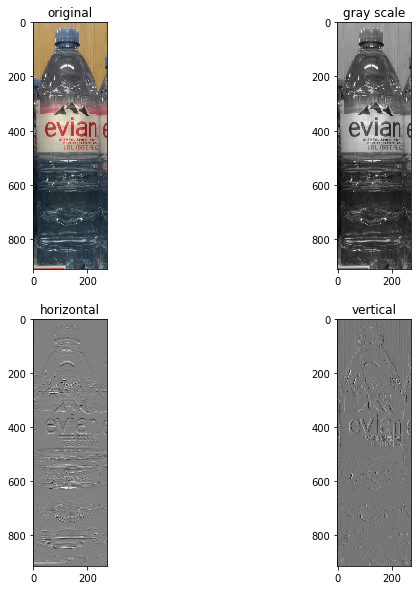

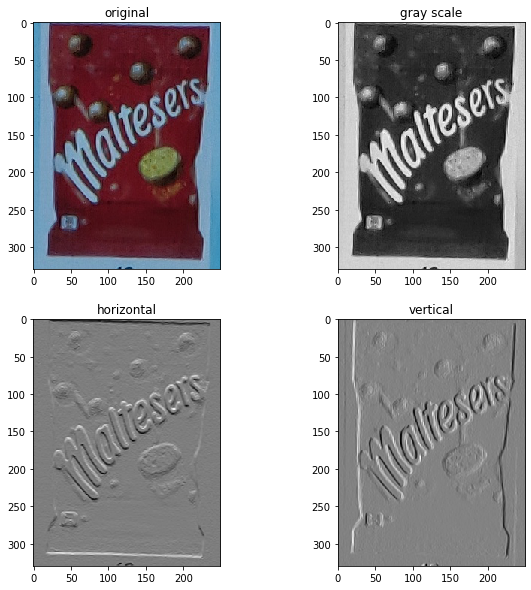

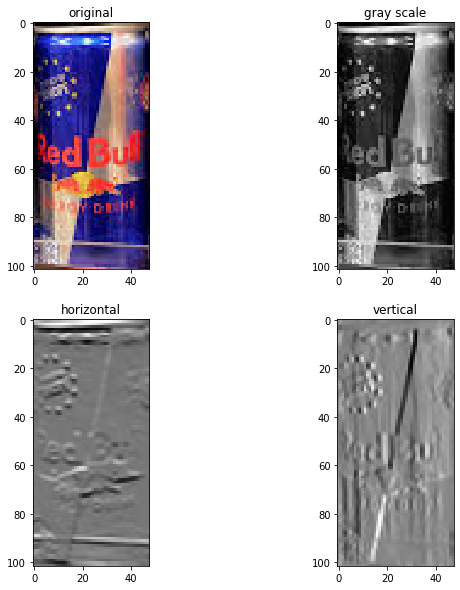

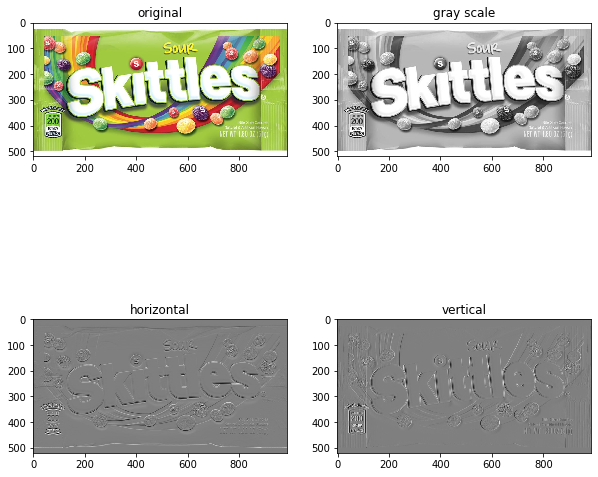

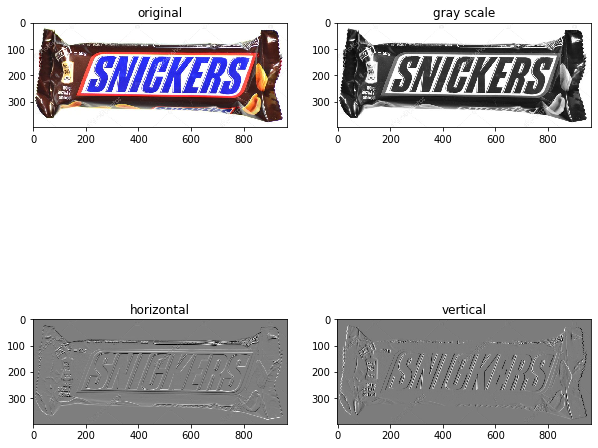

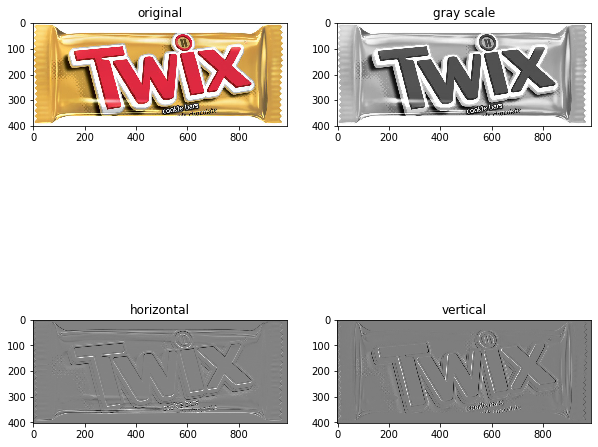

In [8]:
file_names = glob.glob('./eachObjPic/*')
for file in file_names:
    image = plt.imread(file)
    d = edge_detection(image)
    plot_images(d)